# A/B-тест

В ходе учебного проекта по проведению A/B-теста мы примерим на себя роль аналитика крупного интернет-магазина.
Наши задачи включают: 
* приоритизацию гипотез;
* запуск A/B-теста;
* анализ результатов.

## Приоритизация гипотез

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [5]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### ICE

In [6]:
data['ICE'] = (data['Impact'] * data['Confidence'] / data['Efforts']).round(2)

data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### RICE

In [7]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']

data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Изменение приоритизации гипотез при применении RICE вместо ICE

**Топ 4 гипотезы при применении ICE:**

1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

**Топ 4 гипотезы при применении RICE:**

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

**Отличия:**

Гипотеза, которая занимала третье место по ICE, переместилась на первое место по RICE из-за параметра охвата равного 10. Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" с первого места опустилась на пятое, так как её параметр охвата равен всего 1. Приориты 2-й и 3-й гипотез поменялись местами.

## Анализ A/B-теста

### График кумулятивной выручки по группам

In [8]:
register_matplotlib_converters()
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [9]:
print(orders.head())
print(visitors.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


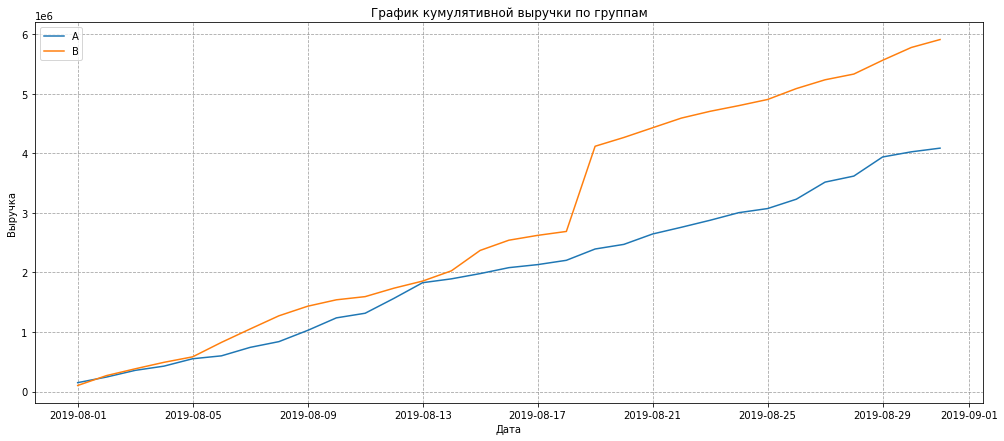

In [10]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

plt.figure(figsize=(17, 7))
plt.grid(linestyle='--', color='gray', alpha=0.7)

cumulativeRevenueA = umulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')


plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.show()

**Вывод:**

Кумулятивная выручка группы **B** выше практически во весь период, чем у группы **A**, за исключением небольших отрезков, где они сравниваются. При этом заметен резкий скачок выручки группы **B** вo второй половинe августа, который скорее всего связан с аномально большими покупками.

### График кумулятивного среднего чека по группам

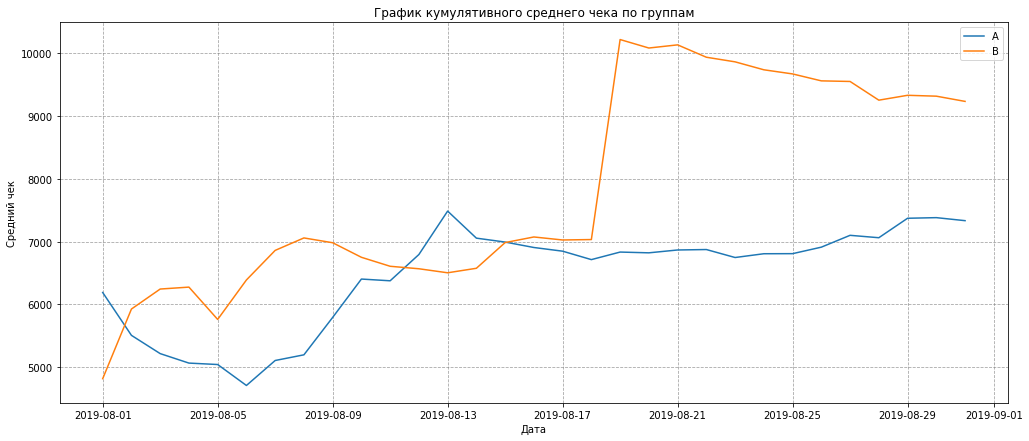

In [11]:
plt.figure(figsize=(17, 7))
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

**Вывод:**

В начале исследуемого периода заметны колебания в среднем чеке у обеих групп. Однако во второй половине исследования кумулятивный средний чек группы **B** резко возрос, в то время как у группы **A** показатели оставались более стабильными. Этот всплеск может указывать на несколько крупных покупок.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

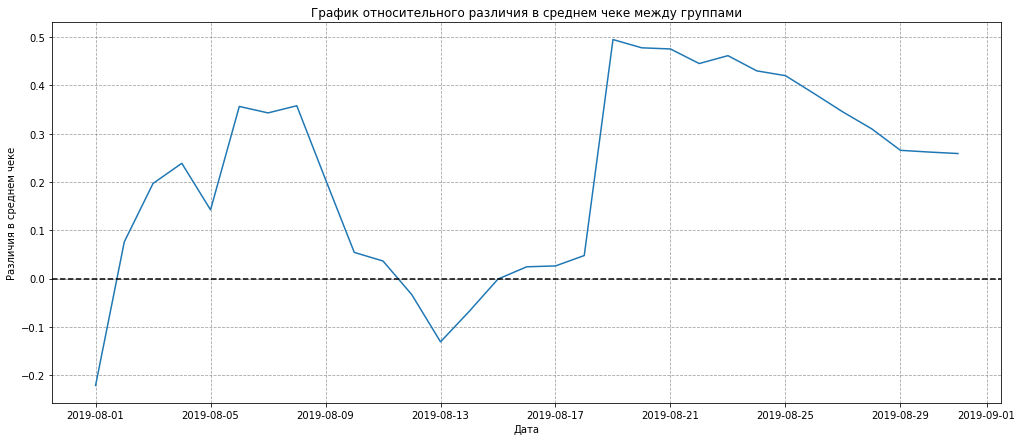

In [12]:
plt.figure(figsize=(17, 7))
plt.grid(linestyle='--', color='gray', alpha=0.7)
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного различия в среднем чеке между группами')
plt.ylabel('Различия в среднем чеке')
plt.xlabel('Дата')
plt.show()

**Вывод:**

В первой половине исследования наблюдался резкий спад в относительном изменении кумулятивного среднего чека группы **B** к группе **A**, а в начале второй половины последовал резкий рост.

### График кумулятивного среднего количества заказов на посетителя по группам

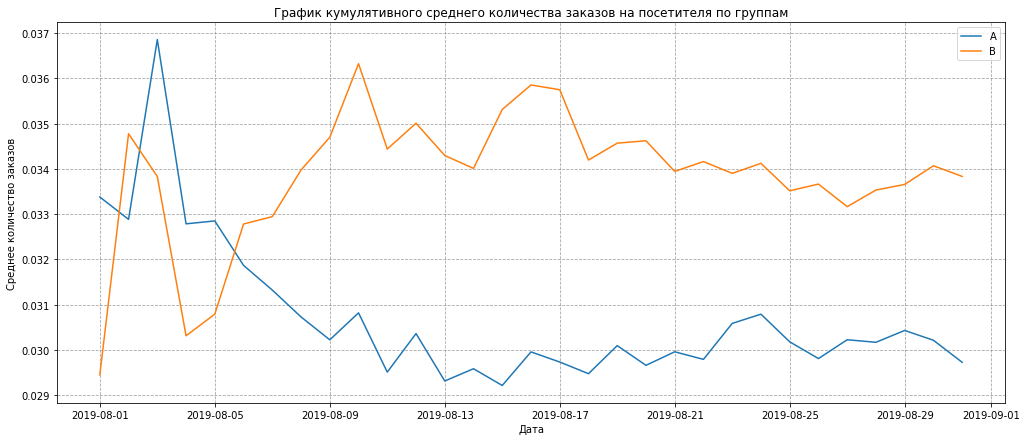

In [13]:
plt.figure(figsize=(17, 7))
plt.grid(linestyle='--', color='gray', alpha=0.7)
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Среднее количество заказов')
plt.xlabel('Дата')
plt.show()


**Вывод:**

Группа **B** имеет более высокое количество заказов на посетителя, чем группа **A**. В начале наблюдений группа **А** имела более высокую конверсию, но на 3-й день наблюдей произошол резкий спад. Резкие начальные колебания обоих групп стабилизируются ближе ко второй половине исследования. 

###  График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

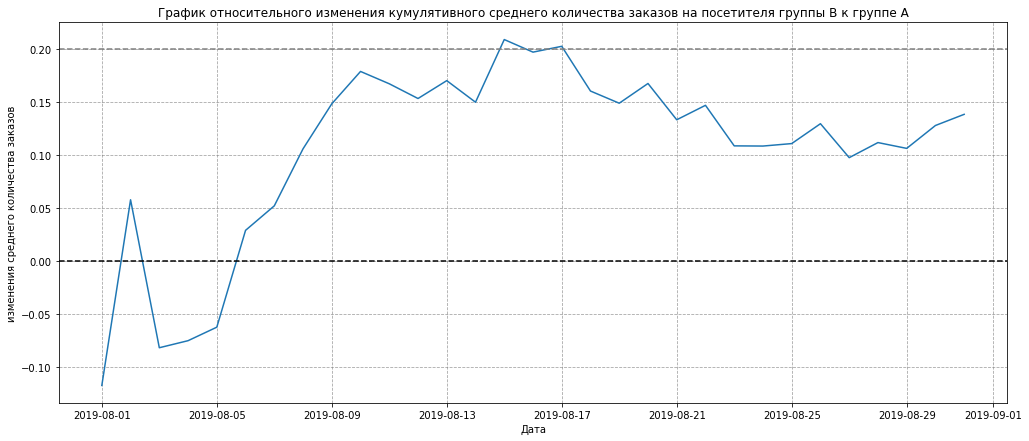

In [14]:
plt.figure(figsize=(17, 7))
plt.grid(linestyle='--', color='gray', alpha=0.7)
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('изменения среднего количества заказов')
plt.xlabel('Дата')
plt.show()

**Вывод:**

Группа **B**, в начале показав более плохой результат относительно группы **А**, на 5-й день исследования демонстрирует рост конверсии пользователей и значительно лучшие показатели по сравнению с группой **А**.

### Точечный график количества заказов по пользователям.

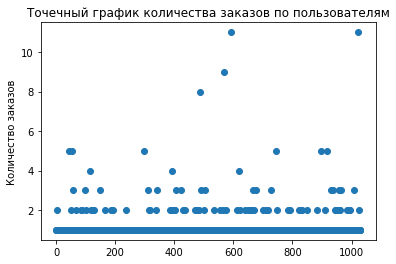

In [15]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'transaction']
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction']) 
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

**Вывод:** 

В основном пользователи совершали не более двух заказов 

### 95-й и 99-й перцентили количества заказов на пользователя

In [16]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Вывод:**

Не более **5%** пользователей совершили больше 2-х заказов и не более **1%** пользователей больше 4-х. Из этого будем считать, что до двух заказов - это нормально, а больше - аномалия.

### Точечный график стоимостей заказов

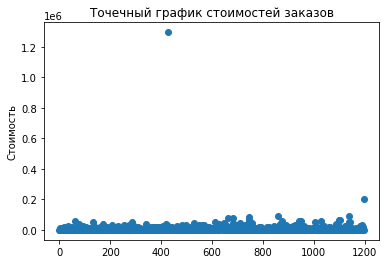

In [17]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость')
plt.show()

**Вывод:** 

Стоимость основного количества заказов не превышает 100к.

### 95-й и 99-й перцентили стоимости заказов

In [18]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод:**

Не более **5%** пользователей потратели на заказ больше 28000 и не более **1%** пользователей больше 58233.2. Из этого будем считать, что до 28000 сумма заказа - это нормально, а больше - аномалия

###  Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

* **Нулевая гипотеза:** различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет.

* **Альтернативная гипотеза:** различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('статистическая значимость:', "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-value: 0.01679
статистическая значимость: 0.138


**Вывод** 

P-value меньше установленного уровня статистической значимости, поэтому отвергаем нулевую гипотезу. Скорее всего, существуют различия в среднем количестве заказов на посетителя между группами.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

* **Нулевая гипотеза:** различий в среднем чеке заказа между группами по «сырым» данным нет.

* **Альтернативная гипотеза:** различия в среднем чеке заказа между группами по «сырым» данным есть.

In [30]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('статистическая значимость:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
статистическая значимость: 0.259


**Вывод:**

P-value больше установленного уровня статистической значимости. Нет оснований отвергать нулевую гипотезу.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

* **Нулевая гипотеза:** различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет.

* **Альтернативная гипотеза:** различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.

In [21]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64


In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('статистическая значимость:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.01304
статистическая значимость: 0.173


**Вывод:**

P-value меньше установленного уровня статистической значимости, поэтому отвергаем нулевую гипотезу. В очищенных данных, скорее всего, также присутствуют различия в среднем количестве заказов на посетителя между группами.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

* **Нулевая гипотеза:** различий в среднем чеке заказа между группами по «очищенным» данным нет.

* **Альтернативная гипотеза:** различия в среднем чеке заказа между группами по «очищенным» данным есть.

In [32]:
print('p-value:', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('статистическая значимость:', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.738
статистическая значимость: -0.020


**Вывод:**

P-value практически не изменился. Он всё также больше установленного уровня статистической значимости, поэтому нет оснований отвергать нулевую гипотезу. Однако уровень различия значительно снизился до -2%.

### Решение по результатам теста и общий вывод

Думаю, что тест можно считать успешным и завершить. Подводя итоги, можно выделить следующее:

* Среднее количество заказов на посетителя различается между группами. Очистка данных не оказала значительного влияния на P-value и уровень различия. Группа **B** имела более высокий уровень конверсии пользователей чем группа **A**


* Различия в среднем чеке на посетителя между группами отсутствуют. После очистки данных от аномальных значений уровень различия снизился до минимального.
